# 1. Imports

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval as leval
import seaborn as sns
from tqdm.auto import tqdm
tqdm.pandas()
from matplotlib import pyplot as plt

# 2. Get test dataset

In [2]:
reference_text_df = pd.read_csv('text_extraction/reference_html_as_sentences_df.csv')
claim_data_df = pd.read_csv('text_extraction/text_reference_claims_df.csv')

## 2.1. References

In here we have the information about the references, including the reference ids and the text/sentences extracted.

In [3]:
reference_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reference_id           676 non-null    object 
 1   reference_property_id  676 non-null    object 
 2   reference_datatype     676 non-null    object 
 3   url                    676 non-null    object 
 4   netloc                 676 non-null    object 
 5   netloc_agg             676 non-null    object 
 6   error_msg              676 non-null    object 
 7   code                   676 non-null    int64  
 8   content-type           676 non-null    object 
 9   final_url              676 non-null    object 
 10  reason                 662 non-null    object 
 11  language_crawl         676 non-null    object 
 12  language_crawl_score   676 non-null    float64
 13  sampling_weight_vb     676 non-null    object 
 14  sampling_weight        676 non-null    float64
 15  html  

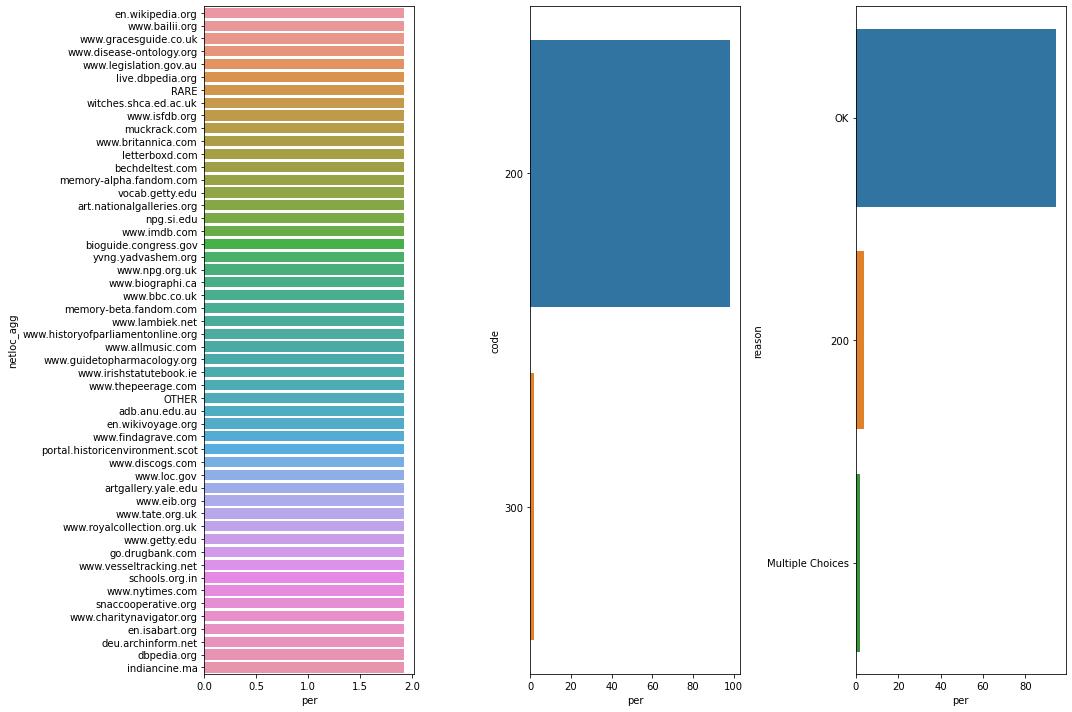

In [4]:
def check_column_dist(df, col):
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'counts']
    counts['per'] = 100*counts['counts']/counts['counts'].sum()
    counts[col] = counts[col].astype(str)
    return counts

# Netlocs are equaly spread
# codes are all good
# reasons are good
fig, ax = plt.subplots(1,3,figsize=(15,10))
sns.barplot(data=check_column_dist(reference_text_df, 'netloc_agg'), x='per', y='netloc_agg', ax=ax[0])
sns.barplot(data=check_column_dist(reference_text_df, 'code'), x='per', y='code', ax=ax[1])
sns.barplot(data=check_column_dist(reference_text_df, 'reason'), x='per', y='reason', ax=ax[2])
plt.tight_layout()
plt.show()

## 2.2. Claims

This has all the claim data, including labels, aliases, descriptions, and language IDs.

In [5]:
claim_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reference_id        1572 non-null   object
 1   entity_id           1572 non-null   object
 2   claim_id            1572 non-null   object
 3   rank                1572 non-null   object
 4   property_id         1572 non-null   object
 5   datatype            1572 non-null   object
 6   datavalue           1572 non-null   object
 7   entity_label        1572 non-null   object
 8   entity_label_lan    1572 non-null   object
 9   property_label      1572 non-null   object
 10  property_label_lan  1572 non-null   object
 11  entity_alias        1572 non-null   object
 12  entity_alias_lan    1572 non-null   object
 13  property_alias      1572 non-null   object
 14  property_alias_lan  1572 non-null   object
 15  entity_desc         1572 non-null   object
 16  entity_desc_lan     1572

In [6]:
print('Total counts:')
print(f'{claim_data_df.claim_id.unique().shape[0]} unique claims')
print(f'{claim_data_df.reference_id.unique().shape[0]} unique references')

Total counts:
1571 unique claims
676 unique references


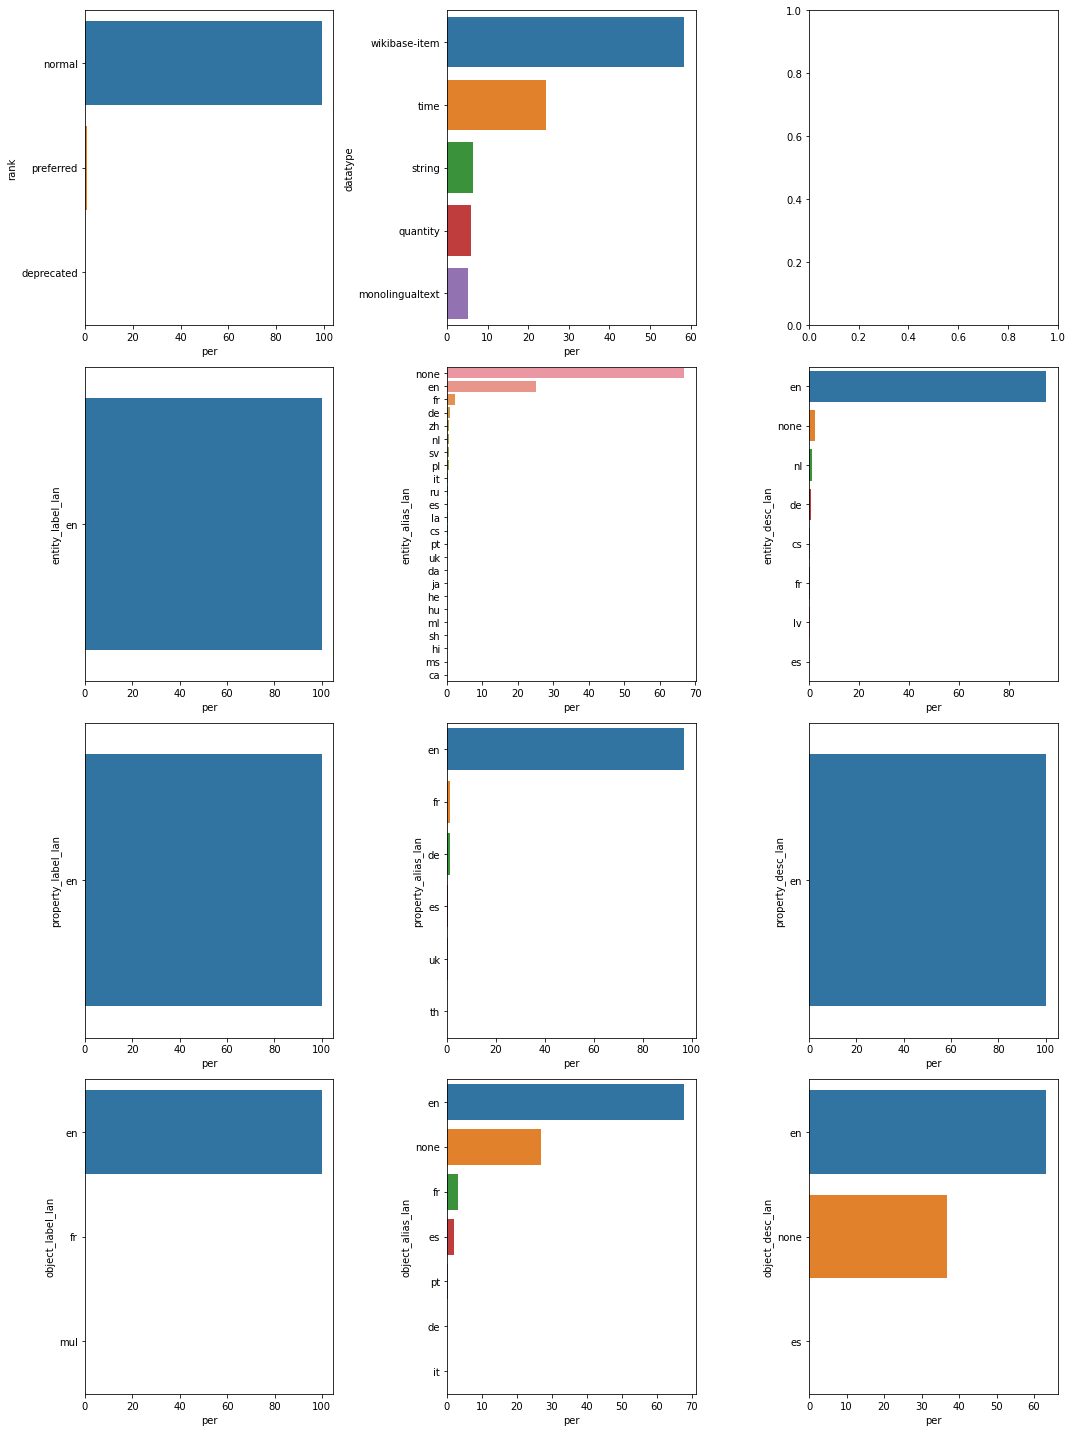

In [7]:
# Considerable amount of aliases for entities, LOTS for properties, reasonable for objects.
# We can use this to generate multiple verbalisations based on aliases.
fig, ax = plt.subplots(4,3,figsize=(15,20))
sns.barplot(data=check_column_dist(claim_data_df, 'rank'), x='per', y='rank', ax=ax[0][0])
sns.barplot(data=check_column_dist(claim_data_df, 'datatype'), x='per', y='datatype', ax=ax[0][1])
#sns.barplot(data=check_column_dist(claim_data_df, 'entity_label_lan'), x='per', y='entity_label_lan', ax=ax[0][2])
sns.barplot(data=check_column_dist(claim_data_df, 'entity_label_lan'), x='per', y='entity_label_lan', ax=ax[1][0])
sns.barplot(data=check_column_dist(claim_data_df, 'entity_alias_lan'), x='per', y='entity_alias_lan', ax=ax[1][1])
sns.barplot(data=check_column_dist(claim_data_df, 'entity_desc_lan'), x='per', y='entity_desc_lan', ax=ax[1][2])
sns.barplot(data=check_column_dist(claim_data_df, 'property_label_lan'), x='per', y='property_label_lan', ax=ax[2][0])
sns.barplot(data=check_column_dist(claim_data_df, 'property_alias_lan'), x='per', y='property_alias_lan', ax=ax[2][1])
sns.barplot(data=check_column_dist(claim_data_df, 'property_desc_lan'), x='per', y='property_desc_lan', ax=ax[2][2])
sns.barplot(data=check_column_dist(claim_data_df, 'object_label_lan'), x='per', y='object_label_lan', ax=ax[3][0])
sns.barplot(data=check_column_dist(claim_data_df, 'object_alias_lan'), x='per', y='object_alias_lan', ax=ax[3][1])
sns.barplot(data=check_column_dist(claim_data_df, 'object_desc_lan'), x='per', y='object_desc_lan', ax=ax[3][2])
plt.tight_layout()
plt.show()

# 3. Verbalisation

In [1]:
from verbalisation import verbalisation_module# import VerbModule

In [11]:
from importlib import reload
reload(verbalisation_module)

<module 'verbalisation.verbalisation_module' from '/home/k20036346/Repos/RefSupPipeline/verbalisation/verbalisation_module.py'>

In [ ]:
verb_module = verbalisation_module.VerbModule()

Graph2Text hparams are: Namespace(logger=True, checkpoint_callback=True, early_stop_callback=False, default_root_dir=None, gradient_clip_val=0, process_position=0, num_nodes=1, num_processes=1, gpus=1, auto_select_gpus=False, log_gpu_memory=None, progress_bar_refresh_rate=1, overfit_batches=0.0, track_grad_norm=-1, check_val_every_n_epoch=1, fast_dev_run=False, accumulate_grad_batches=1, max_epochs=100, min_epochs=1, max_steps=None, min_steps=None, limit_train_batches=1.0, limit_val_batches=1.0, limit_test_batches=1.0, val_check_interval=1.0, log_save_interval=100, row_log_interval=50, distributed_backend=None, sync_batchnorm=False, precision=32, weights_summary='top', weights_save_path=None, num_sanity_val_steps=2, truncated_bptt_steps=None, resume_from_checkpoint=None, profiler=None, benchmark=False, deterministic=False, reload_dataloaders_every_epoch=False, auto_lr_find=False, replace_sampler_ddp=True, terminate_on_nan=False, auto_scale_batch_size=False, prepare_data_per_node=True, 

We have added 3 tokens


In [265]:
verbs = verb_module.verbalise('translate Graph to English: <H> World Trade Center <R> height <T> 200 meter <H> World Trade Center <R> is a <T> tower')
assert verbs == 'The World Trade Center is a tower with a height of 200 meters.'

verbs = verb_module.verbalise({'subject': 'World Trade Center','predicate': 'height','object' : '200 meter'})
assert verbs == 'The height of the World Trade Center is 200 meters.'

verbs = verb_module.verbalise([[
        {'subject': 'World Trade Center','predicate': 'is a','object' : 'tower'},
        {'subject': 'World Trade Center','predicate': 'height','object' : '200 meter'}
]])
assert verbs == 'The World Trade Center is a tower with a height of 200 meters.'

verbs = verb_module.verbalise([
    {'subject': 'World Trade Center','predicate': 'is a','object' : 'tower'},
    {'subject': 'World Trade Center','predicate': 'height','object' : '200 meter'}
])
assert verbs == ['The World Trade Center is a tower.', 'The height of the World Trade Center is 200 meters.']

verb_module.add_label_to_unk_replacer('Cuhppulčohkka')
sent = verb_module.replace_unks_on_sentence('Cuhppul<unk>ohkka is a native label.', empty_after=True)
assert sent == 'Cuhppulčohkka is a native label.'

In [9]:
claim_data_df['reference_claim_id'] = claim_data_df.apply(lambda x : x['reference_id'] + '-' + x['claim_id'], axis=1)

In [13]:
try:
    verbalised_claims_df = pd.read_csv('verbalised_claims_df.csv')
    verbalised_claims_df['reference_claim_id'] = verbalised_claims_df.apply(lambda x : x['reference_id'] + '-' + x['claim_id'], axis=1)
except Exception:
    verbalised_claims_df = None

In [15]:
import json
#ROW_BATCH_SIZE = 4

claim_data_to_keep = [
    'reference_id', 'entity_id', 'claim_id', 'reference_claim_id', 'rank', 'property_id', 'datatype',
    'entity_label', 'entity_desc', 'property_label', 'property_desc', 'object_label', 'object_desc'
] # also add entity_label_is_alias, same for property and object

if verbalised_claims_df is not None and not verbalised_claims_df.empty:
    verbalised_claims = json.loads(
        verbalised_claims_df[verbalised_claims_df['verbalisation'] != 'NO_VERBALISATION'].to_json(orient="records")
    )
else:
    verbalised_claims = []

for i, row in tqdm(claim_data_df.iterrows(), total=claim_data_df.shape[0]):
    if row['reference_claim_id'] in verbalised_claims_df[verbalised_claims_df['verbalisation'] != 'NO_VERBALISATION'].reference_claim_id.unique().tolist():
        #print('skipping')
        continue
    try:
        #if i%ROW_BATCH_SIZE == 0:
        verbalised_claims_this_row = []

        subjects = [row['entity_label']] if row['entity_label_lan'] == 'en' else []
        subjects += leval(row['entity_alias']) if row['entity_alias_lan'] == 'en' else []

        for i_s, subject in enumerate(subjects):

            predicates = [row['property_label']] if row['property_label_lan'] == 'en' else []
            predicates += leval(row['property_alias']) if row['property_alias_lan'] == 'en' else []

            for i_p, predicate in enumerate(predicates):

                objects = [row['object_label']] if row['object_label_lan'] == 'en' else []
                objects += leval(row['object_alias']) if row['object_alias_lan'] == 'en' else []

                for i_o, object_ in enumerate(objects):
   
                    verbalised_claim_entry = {
                        c : row[c] for c in claim_data_to_keep
                    }
                    verbalised_claim_entry.update({
                        'entity_label_is_alias': (i_s != 0),
                        'property_label_is_alias': (i_p != 0),
                        'object_label_is_alias': (i_o != 0),
                        'entity_label': subject,
                        'property_label': predicate,
                        'object_label': object_,
                    })
                    verbalised_claims_this_row.append(verbalised_claim_entry)

        #if (i%ROW_BATCH_SIZE)==(ROW_BATCH_SIZE-1):

        verbalisation_inputs = [{
            'subject':e['entity_label'], 'predicate':e['property_label'], 'object':e['object_label']
        } for e in verbalised_claims_this_row]
        if len(verbalisation_inputs) == 0:
            continue

        verbalisations = verb_module.verbalise(verbalisation_inputs)
        #verbalisations = ['NO_VERBALISATION' for _ in verbalisation_inputs]

        for i in range(len(verbalised_claims_this_row)):
            try:
                verb_module.add_label_to_unk_replacer(verbalised_claims_this_row[i]['entity_label'])
                verb_module.add_label_to_unk_replacer(verbalised_claims_this_row[i]['object_label'])
                verbalised_claims_this_row[i].update({
                    'verbalisation' : verbalisations[i],
                    'verbalisation_unks_replaced': verb_module.replace_unks_on_sentence(verbalisations[i], empty_after=True)
                })
            except Exception:
                #print('REPLACING_ERROR on', verbalised_claims_this_row[i])
                verbalised_claims_this_row[i].update({
                    'verbalisation' : verbalisations[i],
                    'verbalisation_unks_replaced': 'REPLACING_ERROR'
                })

        verbalised_claims += verbalised_claims_this_row
        #break
    except Exception:
        print(row)
        #pprint(verbalised_claims_this_row)
        raise

  0%|          | 0/1572 [00:00<?, ?it/s]

In [16]:
verbalised_claims_df = pd.DataFrame(verbalised_claims)

In [24]:
verbalised_claims_df

,reference_id,entity_id,claim_id,rank,property_id,datatype,entity_label,entity_desc,property_label,property_desc,object_label,object_desc,entity_label_is_alias,property_label_is_alias,object_label_is_alias,verbalisation,verbalisation_unks_replaced,reference_claim_id
0,390d6c6e68a32e11f8d7b0883cda0557db529fe6,Q5512528,Q5512528$81E8AD02-28AF-4AE3-8ACD-047C30B40B01,normal,P20,wikibase-item,G. V. Raja,sports official,place of death,most specific known (e.g. city instead of coun...,Kullu Valley,"valley in Himachal Pradesh, India",False,False,False,G V Raja died in Kullu Valley.,G V Raja died in Kullu Valley.,390d6c6e68a32e11f8d7b0883cda0557db529fe6-Q5512...
1,390d6c6e68a32e11f8d7b0883cda0557db529fe6,Q5512528,Q5512528$81E8AD02-28AF-4AE3-8ACD-047C30B40B01,normal,P20,wikibase-item,G. V. Raja,sports official,deathplace,most specific known (e.g. city instead of coun...,Kullu Valley,"valley in Himachal Pradesh, India",False,True,False,G V Raja died in Kullu Valley.,G V Raja died in Kullu Valley.,390d6c6e68a32e11f8d7b0883cda0557db529fe6-Q5512...
2,390d6c6e68a32e11f8d7b0883cda0557db529fe6,Q5512528,Q5512528$81E8AD02-28AF-4AE3-8ACD-047C30B40B01,normal,P20,wikibase-item,G. V. Raja,sports official,died in,most specific known (e.g. city instead of coun...,Kullu Valley,"valley in Himachal Pradesh, India",False,True,False,G V Raja died in Kullu Valley.,G V Raja died in Kullu Valley.,390d6c6e68a32e11f8d7b0883cda0557db529fe6-Q5512...
3,390d6c6e68a32e11f8d7b0883cda0557db529fe6,Q5512528,Q5512528$81E8AD02-28AF-4AE3-8ACD-047C30B40B01,normal,P20,wikibase-item,G. V. Raja,sports official,death place,most specific known (e.g. city instead of coun...,Kullu Valley,"valley in Himachal Pradesh, India",False,True,False,G V Raja died in Kullu Valley.,G V Raja died in Kullu Valley.,390d6c6e68a32e11f8d7b0883cda0557db529fe6-Q5512...
4,390d6c6e68a32e11f8d7b0883cda0557db529fe6,Q5512528,Q5512528$81E8AD02-28AF-4AE3-8ACD-047C30B40B01,normal,P20,wikibase-item,G. V. Raja,sports official,POD,most specific known (e.g. city instead of coun...,Kullu Valley,"valley in Himachal Pradesh, India",False,True,False,G V Raja is a member of the POD in Kullu Valley.,G V Raja is a member of the POD in Kullu Valley.,390d6c6e68a32e11f8d7b0883cda0557db529fe6-Q5512...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161758,6e6204011de4f4176362a6f4067486a94fc6ac3e,Q58435606,Q58435606$82576BDF-9365-462C-B1F8-A6FF6B8FBE9D,normal,P462,wikibase-item,Jai Bhawani,1928 film,with the color,color of subject,B&W,monochrome form in visual arts,False,True,True,NO_VERBALISATION,REPLACING_ERROR,6e6204011de4f4176362a6f4067486a94fc6ac3e-Q5843...
161759,6e6204011de4f4176362a6f4067486a94fc6ac3e,Q58435606,Q58435606$82576BDF-9365-462C-B1F8-A6FF6B8FBE9D,normal,P462,wikibase-item,Jai Bhawani,1928 film,with the color,color of subject,colorless cinema,monochrome form in visual arts,False,True,True,NO_VERBALISATION,REPLACING_ERROR,6e6204011de4f4176362a6f4067486a94fc6ac3e-Q5843...
161760,6e6204011de4f4176362a6f4067486a94fc6ac3e,Q58435606,Q58435606$82576BDF-9365-462C-B1F8-A6FF6B8FBE9D,normal,P462,wikibase-item,Jai Bhawani,1928 film,with the color,color of subject,black-and-white cinema,monochrome form in visual arts,False,True,True,NO_VERBALISATION,REPLACING_ERROR,6e6204011de4f4176362a6f4067486a94fc6ac3e-Q5843...
161761,6e6204011de4f4176362a6f4067486a94fc6ac3e,Q58435606,Q58435606$82576BDF-9365-462C-B1F8-A6FF6B8FBE9D,normal,P462,wikibase-item,Jai Bhawani,1928 film,with the color,color of subject,black and white film,monochrome form in visual arts,False,True,True,NO_VERBALISATION,REPLACING_ERROR,6e6204011de4f4176362a6f4067486a94fc6ac3e-Q5843...


In [25]:
verbalised_claims_df.to_csv('verbalised_claims_df.csv', index=None)

## Verbalised data analysis

In [5]:
verbalised_claims_df = pd.read_csv('verbalised_claims_df.csv')
verbalised_claims_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26719 entries, 0 to 26718
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   reference_id                 26719 non-null  object
 1   entity_id                    26719 non-null  object
 2   claim_id                     26719 non-null  object
 3   rank                         26719 non-null  object
 4   property_id                  26719 non-null  object
 5   datatype                     26719 non-null  object
 6   entity_label                 26719 non-null  object
 7   entity_desc                  26719 non-null  object
 8   property_label               26719 non-null  object
 9   property_desc                26719 non-null  object
 10  object_label                 26719 non-null  object
 11  object_desc                  26719 non-null  object
 12  entity_label_is_alias        26719 non-null  bool  
 13  property_label_is_alias      26

In [11]:
# No unk replacement was actually ever needed
assert verbalised_claims_df[verbalised_claims_df['verbalisation'].apply(lambda x : '<unk>' in x)].empty

In [30]:
print('Total verbalised counts:')
print(f'{verbalised_claims_df.claim_id.unique().shape[0]} unique claims')
print(f'{verbalised_claims_df.reference_id.unique().shape[0]} unique references')

Total verbalised counts:
472 unique claims
182 unique references


In [43]:
verbalised_claims_df_main_labels = verbalised_claims_df[(~verbalised_claims_df['entity_label_is_alias'] &\
    ~verbalised_claims_df['property_label_is_alias'] &\
    ~verbalised_claims_df['object_label_is_alias'])]
print(f'{verbalised_claims_df_main_labels.shape[0]} verbalisations with only main labels')
# might be more than unique number of claims as a claim might be associated to multiple references, and here we
# do not count unique claims

473 verbalisations with only main labels


NameError: name 'json' is not defined

# 4. Sentence Selection